In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
from PIL import Image
import os


In [5]:
def idw(x, y, z, xi, yi, power=2):
    dist = scipy.spatial.distance.cdist(np.array([xi, yi]).T, np.array([x, y]).T, 'euclidean')
    dist[dist == 0] = 1e-10
    weights = 1 / dist**power
    weights /= weights.sum(axis=1)[:, None]
    zi = np.dot(weights, z)
    
    return zi

def interp(image, power=2):   
    known_coords = np.array(np.where(~np.isnan(image)))
    unknown_coords = np.array(np.where(np.isnan(image)))
    
    known_values = image[~np.isnan(image)]
    
    interpolated_values = idw_interpolation(known_coords[1], known_coords[0], known_values,
                                            unknown_coords[1], unknown_coords[0], power)
    
    filled_image = image.copy()
    filled_image[np.isnan(image)] = interpolated_values
    
    return filled_image

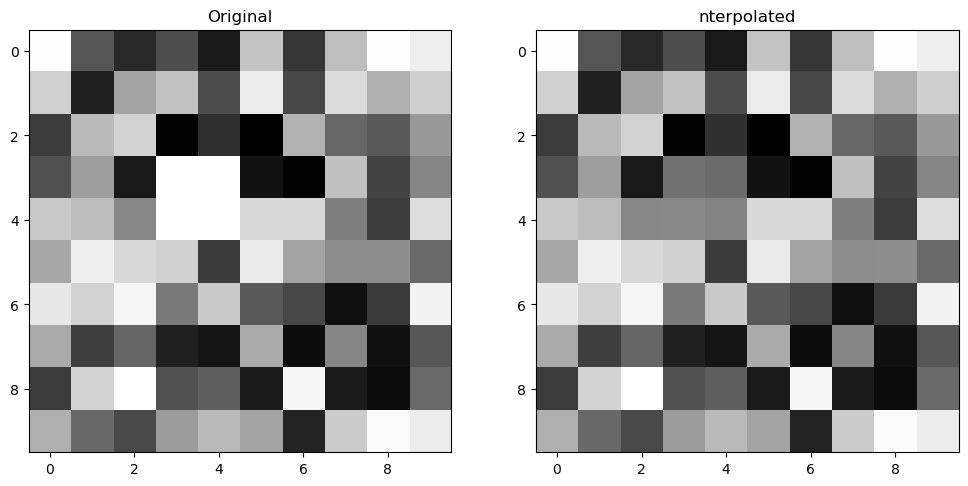

In [7]:
with Image.open(os.getcwd() + "/dataset/void_mask.png") as im:
    im.show()

image = np.zeros((10, 10))
image = np.random.random((10, 10))
image[3:5, 3:5] = np.nan

filled_image = interp(image)

plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("nterpolated")
plt.imshow(filled_image, cmap='gray')
    
plt.show()